In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-plot


In [3]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


# **Importing necessary libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Crime_Data_from_2020_to_Present (1).csv") # Reading the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


# **Dataset Info**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

In [8]:
df = df.dropna(subset=['Vict Descent'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720471 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           720471 non-null  int64  
 1   Date Rptd       720471 non-null  object 
 2   DATE OCC        720471 non-null  object 
 3   TIME OCC        720471 non-null  int64  
 4   AREA            720471 non-null  int64  
 5   AREA NAME       720471 non-null  object 
 6   Rpt Dist No     720471 non-null  int64  
 7   Part 1-2        720471 non-null  int64  
 8   Crm Cd          720471 non-null  int64  
 9   Crm Cd Desc     720471 non-null  object 
 10  Mocodes         714493 non-null  object 
 11  Vict Age        720471 non-null  int64  
 12  Vict Sex        720467 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       720470 non-null  float64
 15  Premis Desc     719989 non-null  object 
 16  Weapon Used Cd  289138 non-null  float64
 17  Weapon Des

# **Separating categorical and numerical features**

In [9]:
object_cols = [i for i in df.columns if df[i].dtype == 'O']
num_cols = [i for i in df.columns if df[i].dtype != 'O']

print("All categorical columns: ", object_cols)
print("All numeric columns: ", num_cols)

print("No. of unique values in each objective column")
df[object_cols].nunique()

All categorical columns:  ['Date Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'Cross Street']
All numeric columns:  ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']
No. of unique values in each objective column


Date Rptd         1399
DATE OCC          1399
AREA NAME           21
Crm Cd Desc        137
Mocodes         276551
Vict Sex             5
Vict Descent        20
Premis Desc        306
Weapon Desc         79
Status               6
Status Desc          6
LOCATION         60995
Cross Street      8807
dtype: int64

In [10]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720471 entries, 0 to 829777
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           720471 non-null  int64  
 1   TIME OCC        720471 non-null  int64  
 2   AREA            720471 non-null  int64  
 3   Rpt Dist No     720471 non-null  int64  
 4   Part 1-2        720471 non-null  int64  
 5   Crm Cd          720471 non-null  int64  
 6   Vict Age        720471 non-null  int64  
 7   Premis Cd       720470 non-null  float64
 8   Weapon Used Cd  289138 non-null  float64
 9   Crm Cd 1        720462 non-null  float64
 10  Crm Cd 2        60867 non-null   float64
 11  Crm Cd 3        2056 non-null    float64
 12  Crm Cd 4        61 non-null      float64
 13  LAT             720471 non-null  float64
 14  LON             720471 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 87.9 MB


# **Dropping unwanted features**

In [ ]:
num_cols.remove("Weapon Used Cd")
num_cols.remove("AREA")
num_cols.remove("TIME OCC")
num_cols.remove("Rpt Dist No")
num_cols.remove("Crm Cd")
num_cols.remove("Premis Cd")
num_cols.remove("Crm Cd 1")
num_cols.remove("Crm Cd 2")
num_cols.remove("Crm Cd 3")
num_cols.remove("Crm Cd 4")
num_cols.remove("LAT")
num_cols.remove("LON")
num_cols.remove("DR_NO")

In [ ]:
cat_cols = ["AREA NAME", "Vict Sex", "Status"]

feat_cols = num_cols + cat_cols
label_col = "Vict Descent"

# **Final input Features**

In [ ]:
sel_df = df[feat_cols].copy()

sel_df.head()

,Part 1-2,Vict Age,AREA NAME,Vict Sex,Status
0,2,36,Southwest,F,AO
1,2,25,Central,M,IC
2,2,0,Central,X,AA
3,2,76,N Hollywood,F,IC
4,2,31,Mission,X,IC


In [ ]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Part 1-2   716675 non-null  int64 
 1   Vict Age   716675 non-null  int64 
 2   AREA NAME  716675 non-null  object
 3   Vict Sex   716671 non-null  object
 4   Status     716675 non-null  object
dtypes: int64(2), object(3)
memory usage: 32.8+ MB


In [ ]:
#filling all the feature column with mode value
sel_df = sel_df.apply(lambda col: col.fillna(col.mode()[0]))


sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Part 1-2   716675 non-null  int64 
 1   Vict Age   716675 non-null  int64 
 2   AREA NAME  716675 non-null  object
 3   Vict Sex   716675 non-null  object
 4   Status     716675 non-null  object
dtypes: int64(2), object(3)
memory usage: 32.8+ MB


# **Applying one hot encoding on categorical features**

In [ ]:
feature_df = pd.get_dummies(sel_df)
label_df = pd.get_dummies(df[label_col])

In [ ]:
feature_df.head()

,Part 1-2,Vict Age,AREA NAME_77th Street,AREA NAME_Central,AREA NAME_Devonshire,AREA NAME_Foothill,AREA NAME_Harbor,AREA NAME_Hollenbeck,AREA NAME_Hollywood,AREA NAME_Mission,...,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X,Status_AA,Status_AO,Status_CC,Status_IC,Status_JA,Status_JO
0,2,36,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,25,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,2,76,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,2,31,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
print(sel_df.columns)
print(feature_df.columns)

Index(['Part 1-2', 'Vict Age', 'AREA NAME', 'Vict Sex', 'Status'], dtype='object')
Index(['Part 1-2', 'Vict Age', 'AREA NAME_77th Street', 'AREA NAME_Central',
       'AREA NAME_Devonshire', 'AREA NAME_Foothill', 'AREA NAME_Harbor',
       'AREA NAME_Hollenbeck', 'AREA NAME_Hollywood', 'AREA NAME_Mission',
       'AREA NAME_N Hollywood', 'AREA NAME_Newton', 'AREA NAME_Northeast',
       'AREA NAME_Olympic', 'AREA NAME_Pacific', 'AREA NAME_Rampart',
       'AREA NAME_Southeast', 'AREA NAME_Southwest', 'AREA NAME_Topanga',
       'AREA NAME_Van Nuys', 'AREA NAME_West LA', 'AREA NAME_West Valley',
       'AREA NAME_Wilshire', 'Vict Sex_-', 'Vict Sex_F', 'Vict Sex_H',
       'Vict Sex_M', 'Vict Sex_X', 'Status_AA', 'Status_AO', 'Status_CC',
       'Status_IC', 'Status_JA', 'Status_JO'],
      dtype='object')


In [ ]:
label_df.head()

,-,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
feature_df = pd.get_dummies(feature_df, columns=['Part 1-2'])

# **Normalization on Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_df['Vict Age'] = scaler.fit_transform(feature_df[['Vict Age']])

# **Final shape of input and output features**

In [ ]:
print("Shape of input feature df: ", feature_df.shape)
print("Shape of output label df: ", label_df.shape)

Shape of input feature df:  (716675, 35)
Shape of output label df:  (716675, 20)


In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vict Age               716675 non-null  float64
 1   AREA NAME_77th Street  716675 non-null  uint8  
 2   AREA NAME_Central      716675 non-null  uint8  
 3   AREA NAME_Devonshire   716675 non-null  uint8  
 4   AREA NAME_Foothill     716675 non-null  uint8  
 5   AREA NAME_Harbor       716675 non-null  uint8  
 6   AREA NAME_Hollenbeck   716675 non-null  uint8  
 7   AREA NAME_Hollywood    716675 non-null  uint8  
 8   AREA NAME_Mission      716675 non-null  uint8  
 9   AREA NAME_N Hollywood  716675 non-null  uint8  
 10  AREA NAME_Newton       716675 non-null  uint8  
 11  AREA NAME_Northeast    716675 non-null  uint8  
 12  AREA NAME_Olympic      716675 non-null  uint8  
 13  AREA NAME_Pacific      716675 non-null  uint8  
 14  AREA NAME_Rampart      716675 non-nu

In [ ]:

n_feat = feature_df.shape[1]
n_class = label_df.shape[1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, label_df.values, test_size=0.2, random_state=42
)

# **Defining Model**

In [ ]:


# Model Definition
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(n_feat,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_class, activation='softmax')  # 20 categories
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint callback to save the best model during training
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# EarlyStopping callback to stop training if the model performance doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10
17916/17917 [============================>.] - ETA: 0s - loss: 1.2289 - accuracy: 0.5390
Epoch 1: val_accuracy improved from -inf to 0.55083, saving model to best_model.h5
17917/17917 [==============================] - 98s 5ms/step - loss: 1.2289 - accuracy: 0.5390 - val_loss: 1.1934 - val_accuracy: 0.5508
Epoch 2/10
   43/17917 [..............................] - ETA: 1:04 - loss: 1.2083 - accuracy: 0.5443

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17909/17917 [============================>.] - ETA: 0s - loss: 1.2033 - accuracy: 0.5473
Epoch 2: val_accuracy improved from 0.55083 to 0.55343, saving model to best_model.h5
17917/17917 [==============================] - 100s 6ms/step - loss: 1.2033 - accuracy: 0.5473 - val_loss: 1.1846 - val_accuracy: 0.5534
Epoch 3/10
17910/17917 [============================>.] - ETA: 0s - loss: 1.2001 - accuracy: 0.5480
Epoch 3: val_accuracy did not improve from 0.55343
17917/17917 [==============================] - 90s 5ms/step - loss: 1.2001 - accuracy: 0.5480 - val_loss: 1.1862 - val_accuracy: 0.5529
Epoch 4/10
17913/17917 [============================>.] - ETA: 0s - loss: 1.1982 - accuracy: 0.5488
Epoch 4: val_accuracy did not improve from 0.55343
17917/17917 [==============================] - 88s 5ms/step - loss: 1.1982 - accuracy: 0.5489 - val_loss: 1.1852 - val_accuracy: 0.5532
Epoch 5/10
17908/17917 [============================>.] - ETA: 0s - loss: 1.1970 - accuracy: 0.5492
Epoch 5: val_a

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
best_model = tf.keras.models.load_model("best_model.h5")

# Make predictions on the test set
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert predicted probabilities to class indices

# Convert one-hot encoded true labels to class indices
y_true = np.argmax(y_test, axis=1)

4480/4480 [==============================] - 10s 2ms/step


In [ ]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3592
           2       0.50      0.33      0.40     23536
           3       0.00      0.00      0.00       643
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00       695
           6       0.00      0.00      0.00        13
           7       0.52      0.70      0.60     50748
           8       0.00      0.00      0.00       176
           9       0.00      0.00      0.00       243
          10       0.00      0.00      0.00       866
          11       0.00      0.00      0.00        10
          12       0.63      0.13      0.21     13129
          13       0.00      0.00      0.00        45
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        36
          16       0.00      0.00      0.00       184
          17       0.47      0.59      0.52     33456
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


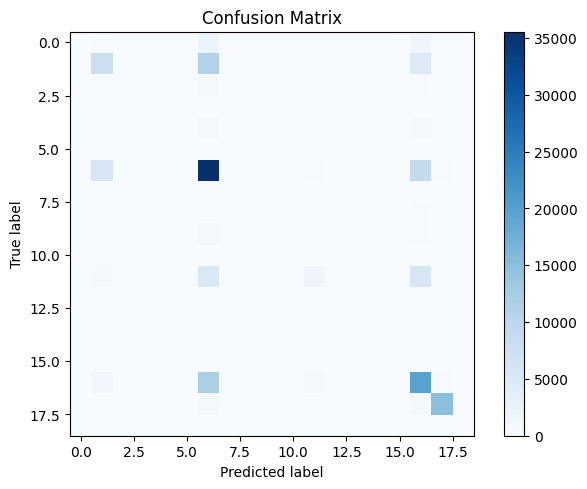

In [ ]:

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           716675 non-null  int64  
 1   Date Rptd       716675 non-null  object 
 2   DATE OCC        716675 non-null  object 
 3   TIME OCC        716675 non-null  int64  
 4   AREA            716675 non-null  int64  
 5   AREA NAME       716675 non-null  object 
 6   Rpt Dist No     716675 non-null  int64  
 7   Part 1-2        716675 non-null  int64  
 8   Crm Cd          716675 non-null  int64  
 9   Crm Cd Desc     716675 non-null  object 
 10  Mocodes         710723 non-null  object 
 11  Vict Age        716675 non-null  int64  
 12  Vict Sex        716671 non-null  object 
 13  Vict Descent    716675 non-null  object 
 14  Premis Cd       716674 non-null  float64
 15  Premis Desc     716197 non-null  object 
 16  Weapon Used Cd  287571 non-null  float64
 17  Weapon Des

In [ ]:
columns = ['AREA NAME', 'Part 1-2', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Status' ]
new_df = df[columns]
new_df

,AREA NAME,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status
0,Southwest,2,36,F,B,AO
1,Central,2,25,M,H,IC
2,Central,2,0,X,X,AA
3,N Hollywood,2,76,F,W,IC
4,Mission,2,31,X,X,IC
...,...,...,...,...,...,...
825207,Foothill,2,23,M,H,IC
825208,Foothill,1,25,F,H,IC
825209,77th Street,1,29,M,B,IC
825210,Central,1,24,F,H,IC


# **FCNN (2)**

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA NAME     716675 non-null  object
 1   Part 1-2      716675 non-null  int64 
 2   Vict Age      716675 non-null  int64 
 3   Vict Sex      716671 non-null  object
 4   Vict Descent  716675 non-null  object
 5   Status        716675 non-null  object
dtypes: int64(2), object(4)
memory usage: 38.3+ MB


# Imbalanced **dataset**

In [ ]:
new_df['Vict Descent'].value_counts()

H    253152
W    168138
B    117571
X     79573
O     65408
A     18056
K      4391
F      3435
C      3167
J      1145
V       851
I       772
Z       412
P       219
U       167
D        62
G        58
L        50
S        46
-         2
Name: Vict Descent, dtype: int64

In [ ]:
values_to_remove = ['V', 'I', 'Z', 'P', 'U', 'D', 'G', 'L', 'S', '-', 'J', 'C', 'F', 'K', 'A']

# Filter the DataFrame to exclude rows with specified values
new_df = new_df[~new_df['Vict Descent'].isin(values_to_remove)]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683842 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA NAME     683842 non-null  object
 1   Part 1-2      683842 non-null  int64 
 2   Vict Age      683842 non-null  int64 
 3   Vict Sex      683838 non-null  object
 4   Vict Descent  683842 non-null  object
 5   Status        683842 non-null  object
dtypes: int64(2), object(4)
memory usage: 36.5+ MB


In [ ]:
new_df = new_df[new_df['Vict Descent'].notnull()]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683842 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA NAME     683842 non-null  object
 1   Part 1-2      683842 non-null  int64 
 2   Vict Age      683842 non-null  int64 
 3   Vict Sex      683838 non-null  object
 4   Vict Descent  683842 non-null  object
 5   Status        683842 non-null  object
dtypes: int64(2), object(4)
memory usage: 36.5+ MB


In [ ]:
new_df = new_df[new_df['Vict Sex'].notnull()]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA NAME     683838 non-null  object
 1   Part 1-2      683838 non-null  int64 
 2   Vict Age      683838 non-null  int64 
 3   Vict Sex      683838 non-null  object
 4   Vict Descent  683838 non-null  object
 5   Status        683838 non-null  object
dtypes: int64(2), object(4)
memory usage: 36.5+ MB


In [ ]:
new_feature_cols = ["AREA NAME", "Vict Sex", "Status", "Part 1-2"]
new_label_col = "Vict Descent"

In [ ]:
new_feature_df = pd.get_dummies(new_df[new_feature_cols])
new_label_df = pd.get_dummies(df[new_label_col])

In [ ]:
new_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Part 1-2               683838 non-null  int64
 1   AREA NAME_77th Street  683838 non-null  uint8
 2   AREA NAME_Central      683838 non-null  uint8
 3   AREA NAME_Devonshire   683838 non-null  uint8
 4   AREA NAME_Foothill     683838 non-null  uint8
 5   AREA NAME_Harbor       683838 non-null  uint8
 6   AREA NAME_Hollenbeck   683838 non-null  uint8
 7   AREA NAME_Hollywood    683838 non-null  uint8
 8   AREA NAME_Mission      683838 non-null  uint8
 9   AREA NAME_N Hollywood  683838 non-null  uint8
 10  AREA NAME_Newton       683838 non-null  uint8
 11  AREA NAME_Northeast    683838 non-null  uint8
 12  AREA NAME_Olympic      683838 non-null  uint8
 13  AREA NAME_Pacific      683838 non-null  uint8
 14  AREA NAME_Rampart      683838 non-null  uint8
 15  AREA NAME_Southea

In [ ]:
new_feature_df

,Part 1-2,AREA NAME_77th Street,AREA NAME_Central,AREA NAME_Devonshire,AREA NAME_Foothill,AREA NAME_Harbor,AREA NAME_Hollenbeck,AREA NAME_Hollywood,AREA NAME_Mission,AREA NAME_N Hollywood,...,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X,Status_AA,Status_AO,Status_CC,Status_IC,Status_JA,Status_JO
0,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825207,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
825208,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
825209,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
825210,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
new_feature_df = pd.get_dummies(new_feature_df, columns=['Part 1-2'])
new_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   AREA NAME_77th Street  683838 non-null  uint8
 1   AREA NAME_Central      683838 non-null  uint8
 2   AREA NAME_Devonshire   683838 non-null  uint8
 3   AREA NAME_Foothill     683838 non-null  uint8
 4   AREA NAME_Harbor       683838 non-null  uint8
 5   AREA NAME_Hollenbeck   683838 non-null  uint8
 6   AREA NAME_Hollywood    683838 non-null  uint8
 7   AREA NAME_Mission      683838 non-null  uint8
 8   AREA NAME_N Hollywood  683838 non-null  uint8
 9   AREA NAME_Newton       683838 non-null  uint8
 10  AREA NAME_Northeast    683838 non-null  uint8
 11  AREA NAME_Olympic      683838 non-null  uint8
 12  AREA NAME_Pacific      683838 non-null  uint8
 13  AREA NAME_Rampart      683838 non-null  uint8
 14  AREA NAME_Southeast    683838 non-null  uint8
 15  AREA NAME_Southwe

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df['Vict Age'] = scaler.fit_transform(new_df[['Vict Age']])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA NAME     683838 non-null  object 
 1   Part 1-2      683838 non-null  int64  
 2   Vict Age      683838 non-null  float64
 3   Vict Sex      683838 non-null  object 
 4   Vict Descent  683838 non-null  object 
 5   Status        683838 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 36.5+ MB


In [ ]:
new_feature_df['Vict Age'] = new_df['Vict Age']
new_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA NAME_77th Street  683838 non-null  uint8  
 1   AREA NAME_Central      683838 non-null  uint8  
 2   AREA NAME_Devonshire   683838 non-null  uint8  
 3   AREA NAME_Foothill     683838 non-null  uint8  
 4   AREA NAME_Harbor       683838 non-null  uint8  
 5   AREA NAME_Hollenbeck   683838 non-null  uint8  
 6   AREA NAME_Hollywood    683838 non-null  uint8  
 7   AREA NAME_Mission      683838 non-null  uint8  
 8   AREA NAME_N Hollywood  683838 non-null  uint8  
 9   AREA NAME_Newton       683838 non-null  uint8  
 10  AREA NAME_Northeast    683838 non-null  uint8  
 11  AREA NAME_Olympic      683838 non-null  uint8  
 12  AREA NAME_Pacific      683838 non-null  uint8  
 13  AREA NAME_Rampart      683838 non-null  uint8  
 14  AREA NAME_Southeast    683838 non-nu

In [ ]:
new_label_df = pd.get_dummies(new_df[new_label_col])
new_label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683838 entries, 0 to 825211
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       683838 non-null  uint8
 1   H       683838 non-null  uint8
 2   O       683838 non-null  uint8
 3   W       683838 non-null  uint8
 4   X       683838 non-null  uint8
dtypes: uint8(5)
memory usage: 8.5 MB


In [ ]:

new_n_feat = new_feature_df.shape[1]
new_n_class = new_label_df.shape[1]

# # Splitting the data into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    new_feature_df.values, new_label_df.values, test_size=0.2, random_state=42
)

In [ ]:
# Model Definition
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(new_n_feat,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(new_n_class, activation='softmax')  # Assuming 20 categories, adjust as needed
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  ModelCheckpoint callback to save the best model during training
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# EarlyStopping callback to stop training if the model performance doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training
history = model.fit(
    new_X_train, new_y_train,
    epochs=10,
    batch_size=32,
    validation_data=(new_X_test, new_y_test),
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10
17088/17096 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.5663
Epoch 1: val_accuracy improved from -inf to 0.57828, saving model to best_model.h5
17096/17096 [==============================] - 87s 5ms/step - loss: 1.0301 - accuracy: 0.5662 - val_loss: 1.0019 - val_accuracy: 0.5783
Epoch 2/10
   19/17096 [..............................] - ETA: 1:37 - loss: 1.0446 - accuracy: 0.5280

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17093/17096 [============================>.] - ETA: 0s - loss: 1.0122 - accuracy: 0.5745
Epoch 2: val_accuracy improved from 0.57828 to 0.57834, saving model to best_model.h5
17096/17096 [==============================] - 86s 5ms/step - loss: 1.0122 - accuracy: 0.5745 - val_loss: 0.9994 - val_accuracy: 0.5783
Epoch 3/10
17093/17096 [============================>.] - ETA: 0s - loss: 1.0098 - accuracy: 0.5750
Epoch 3: val_accuracy improved from 0.57834 to 0.57959, saving model to best_model.h5
17096/17096 [==============================] - 85s 5ms/step - loss: 1.0098 - accuracy: 0.5750 - val_loss: 0.9955 - val_accuracy: 0.5796
Epoch 4/10
17093/17096 [============================>.] - ETA: 0s - loss: 1.0078 - accuracy: 0.5766
Epoch 4: val_accuracy did not improve from 0.57959
17096/17096 [==============================] - 84s 5ms/step - loss: 1.0078 - accuracy: 0.5766 - val_loss: 0.9959 - val_accuracy: 0.5794
Epoch 5/10
17093/17096 [============================>.] - ETA: 0s - loss: 1.0061

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions
best_model = tf.keras.models.load_model("best_model.h5")

# Make predictions on the test set
new_y_pred_probs = best_model.predict(new_X_test)
new_y_pred = np.argmax(new_y_pred_probs, axis=1)  # Convert predicted probabilities to class indices

# Convert one-hot encoded true labels to class indices
new_y_true = np.argmax(new_y_test, axis=1)

4274/4274 [==============================] - 8s 2ms/step


In [ ]:
class_report = classification_report(new_y_true, new_y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.27      0.36     23730
           1       0.55      0.73      0.63     50371
           2       0.64      0.12      0.20     13113
           3       0.50      0.59      0.54     33703
           4       0.96      0.94      0.95     15851

    accuracy                           0.58    136768
   macro avg       0.64      0.53      0.53    136768
weighted avg       0.59      0.58      0.56    136768



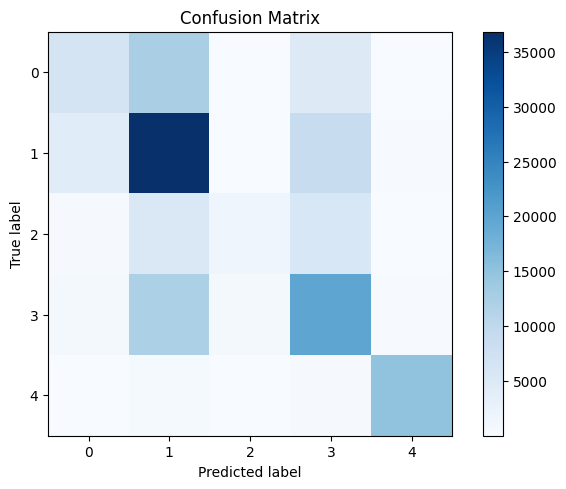

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(new_y_true, new_y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **FCNN(3) Considering top 3 target features**

In [ ]:
new2_df = new_df

In [ ]:
new_values_to_remove = ['V', 'I', 'Z', 'P', 'U', 'D', 'G', 'L', 'S', '-', 'A', 'X', 'O', 'K','F', 'C', 'J']

new2_df = new2_df[~new2_df['Vict Descent'].isin(new_values_to_remove)]

In [ ]:
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA NAME     538857 non-null  object 
 1   Part 1-2      538857 non-null  int64  
 2   Vict Age      538857 non-null  float64
 3   Vict Sex      538857 non-null  object 
 4   Vict Descent  538857 non-null  object 
 5   Status        538857 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.8+ MB


In [ ]:
new2_feature_cols = ["AREA NAME", "Vict Sex", "Status", "Part 1-2"]
new2_label_col = "Vict Descent"

In [ ]:
new2_feature_df = pd.get_dummies(new2_df[new_feature_cols])
new2_label_df = pd.get_dummies(new2_df[new_label_col])

In [ ]:
new2_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Part 1-2               538857 non-null  int64
 1   AREA NAME_77th Street  538857 non-null  uint8
 2   AREA NAME_Central      538857 non-null  uint8
 3   AREA NAME_Devonshire   538857 non-null  uint8
 4   AREA NAME_Foothill     538857 non-null  uint8
 5   AREA NAME_Harbor       538857 non-null  uint8
 6   AREA NAME_Hollenbeck   538857 non-null  uint8
 7   AREA NAME_Hollywood    538857 non-null  uint8
 8   AREA NAME_Mission      538857 non-null  uint8
 9   AREA NAME_N Hollywood  538857 non-null  uint8
 10  AREA NAME_Newton       538857 non-null  uint8
 11  AREA NAME_Northeast    538857 non-null  uint8
 12  AREA NAME_Olympic      538857 non-null  uint8
 13  AREA NAME_Pacific      538857 non-null  uint8
 14  AREA NAME_Rampart      538857 non-null  uint8
 15  AREA NAME_Southea

In [ ]:
new2_label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       538857 non-null  uint8
 1   H       538857 non-null  uint8
 2   W       538857 non-null  uint8
dtypes: uint8(3)
memory usage: 5.7 MB


In [ ]:
new2_feature_df

,Part 1-2,AREA NAME_77th Street,AREA NAME_Central,AREA NAME_Devonshire,AREA NAME_Foothill,AREA NAME_Harbor,AREA NAME_Hollenbeck,AREA NAME_Hollywood,AREA NAME_Mission,AREA NAME_N Hollywood,...,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X,Status_AA,Status_AO,Status_CC,Status_IC,Status_JA,Status_JO
0,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825207,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
825208,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
825209,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
825210,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
new2_feature_df = pd.get_dummies(new2_feature_df, columns=['Part 1-2'])
new2_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   AREA NAME_77th Street  538857 non-null  uint8
 1   AREA NAME_Central      538857 non-null  uint8
 2   AREA NAME_Devonshire   538857 non-null  uint8
 3   AREA NAME_Foothill     538857 non-null  uint8
 4   AREA NAME_Harbor       538857 non-null  uint8
 5   AREA NAME_Hollenbeck   538857 non-null  uint8
 6   AREA NAME_Hollywood    538857 non-null  uint8
 7   AREA NAME_Mission      538857 non-null  uint8
 8   AREA NAME_N Hollywood  538857 non-null  uint8
 9   AREA NAME_Newton       538857 non-null  uint8
 10  AREA NAME_Northeast    538857 non-null  uint8
 11  AREA NAME_Olympic      538857 non-null  uint8
 12  AREA NAME_Pacific      538857 non-null  uint8
 13  AREA NAME_Rampart      538857 non-null  uint8
 14  AREA NAME_Southeast    538857 non-null  uint8
 15  AREA NAME_Southwe

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new2_df['Vict Age'] = scaler.fit_transform(new2_df[['Vict Age']])
new2_df.info()

<ipython-input-62-2fb95a6e8294>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2_df['Vict Age'] = scaler.fit_transform(new2_df[['Vict Age']])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA NAME     538857 non-null  object 
 1   Part 1-2      538857 non-null  int64  
 2   Vict Age      538857 non-null  float64
 3   Vict Sex      538857 non-null  object 
 4   Vict Descent  538857 non-null  object 
 5   Status        538857 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.8+ MB


In [ ]:
new2_feature_df['Vict Age'] = new2_df['Vict Age']
new2_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA NAME_77th Street  538857 non-null  uint8  
 1   AREA NAME_Central      538857 non-null  uint8  
 2   AREA NAME_Devonshire   538857 non-null  uint8  
 3   AREA NAME_Foothill     538857 non-null  uint8  
 4   AREA NAME_Harbor       538857 non-null  uint8  
 5   AREA NAME_Hollenbeck   538857 non-null  uint8  
 6   AREA NAME_Hollywood    538857 non-null  uint8  
 7   AREA NAME_Mission      538857 non-null  uint8  
 8   AREA NAME_N Hollywood  538857 non-null  uint8  
 9   AREA NAME_Newton       538857 non-null  uint8  
 10  AREA NAME_Northeast    538857 non-null  uint8  
 11  AREA NAME_Olympic      538857 non-null  uint8  
 12  AREA NAME_Pacific      538857 non-null  uint8  
 13  AREA NAME_Rampart      538857 non-null  uint8  
 14  AREA NAME_Southeast    538857 non-nu

In [ ]:
new2_label_df = pd.get_dummies(new2_df[new_label_col])
new2_label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538857 entries, 0 to 825211
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       538857 non-null  uint8
 1   H       538857 non-null  uint8
 2   W       538857 non-null  uint8
dtypes: uint8(3)
memory usage: 5.7 MB


In [ ]:
# Assuming your data is loaded into feature_df and label_df
# feature_df has shape (1000, 42) and label_df has shape (100, 16)
new2_n_feat = new2_feature_df.shape[1]
new2_n_class = new2_label_df.shape[1]

# # Split the data into training and testing sets
new2_X_train, new2_X_test, new2_y_train, new2_y_test = train_test_split(
    new2_feature_df.values, new2_label_df.values, test_size=0.2, random_state=42
)

In [ ]:
# Model Definition
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(new2_n_feat,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(new2_n_class, activation='softmax')  # Assuming 20 categories, adjust as needed
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save the best model during training
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback to stop training if the model performance doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training
history = model.fit(
    new2_X_train, new2_y_train,
    epochs=10,
    batch_size=32,
    validation_data=(new2_X_test, new2_y_test),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
13463/13472 [============================>.] - ETA: 0s - loss: 0.8731 - accuracy: 0.5894
Epoch 1: val_accuracy improved from -inf to 0.59157, saving model to best_model.h5
13472/13472 [==============================] - 66s 5ms/step - loss: 0.8731 - accuracy: 0.5893 - val_loss: 0.8693 - val_accuracy: 0.5916
Epoch 2/10
   45/13472 [..............................] - ETA: 47s - loss: 0.8560 - accuracy: 0.5951

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13470/13472 [============================>.] - ETA: 0s - loss: 0.8666 - accuracy: 0.5933
Epoch 2: val_accuracy improved from 0.59157 to 0.59357, saving model to best_model.h5
13472/13472 [==============================] - 65s 5ms/step - loss: 0.8666 - accuracy: 0.5933 - val_loss: 0.8678 - val_accuracy: 0.5936
Epoch 3/10
13460/13472 [============================>.] - ETA: 0s - loss: 0.8651 - accuracy: 0.5942
Epoch 3: val_accuracy did not improve from 0.59357
13472/13472 [==============================] - 63s 5ms/step - loss: 0.8651 - accuracy: 0.5942 - val_loss: 0.8663 - val_accuracy: 0.5934
Epoch 4/10
13472/13472 [==============================] - ETA: 0s - loss: 0.8638 - accuracy: 0.5948
Epoch 4: val_accuracy did not improve from 0.59357
13472/13472 [==============================] - 63s 5ms/step - loss: 0.8638 - accuracy: 0.5948 - val_loss: 0.8672 - val_accuracy: 0.5934
Epoch 5/10
13468/13472 [============================>.] - ETA: 0s - loss: 0.8630 - accuracy: 0.5948
Epoch 5: val_ac

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions
best_model = tf.keras.models.load_model("best_model.h5")

# Make predictions on the test set
new2_y_pred_probs = best_model.predict(new2_X_test)
new2_y_pred = np.argmax(new2_y_pred_probs, axis=1)  # Convert predicted probabilities to class indices

# Convert one-hot encoded true labels to class indices
new2_y_true = np.argmax(new2_y_test, axis=1)

3368/3368 [==============================] - 6s 2ms/step


In [ ]:
class_report = classification_report(new2_y_true, new2_y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.31      0.39     23506
           1       0.61      0.72      0.66     50547
           2       0.59      0.62      0.60     33719

    accuracy                           0.60    107772
   macro avg       0.58      0.55      0.55    107772
weighted avg       0.59      0.60      0.58    107772



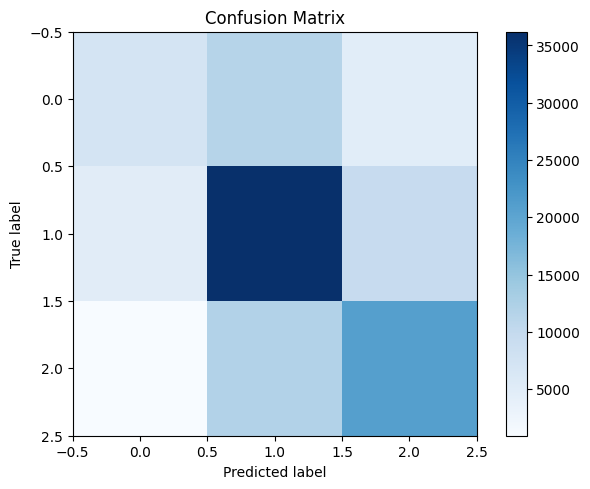

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(new2_y_true, new2_y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Hyperparameter Tuning on FCNN**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


<ipython-input-71-7bb571729a7c>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(new2_n_feat,)))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(units=hp.Int('units_3', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(units=hp.Int('units_4', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(new2_n_class, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='tuner_directory',
    project_name='my_tuner'
)

In [ ]:
tuner.search(new2_X_train, new2_y_train, epochs=10, batch_size=32, validation_data=(new2_X_test, new2_y_test))


Trial 3 Complete [00h 12m 23s]
val_accuracy: 0.5935957431793213

Best val_accuracy So Far: 0.5956834554672241
Total elapsed time: 00h 37m 10s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
final_model = tuner.hypermodel.build(best_hps)
final_model.fit(new2_X_train, new2_y_train, epochs=10, batch_size=32, validation_data=(new2_X_test, new2_y_test))

Epoch 1/10
13472/13472 [==============================] - 68s 5ms/step - loss: 0.8755 - accuracy: 0.5877 - val_loss: 0.8700 - val_accuracy: 0.5903
Epoch 2/10
13472/13472 [==============================] - 67s 5ms/step - loss: 0.8658 - accuracy: 0.5933 - val_loss: 0.8662 - val_accuracy: 0.5937
Epoch 3/10
13472/13472 [==============================] - 67s 5ms/step - loss: 0.8639 - accuracy: 0.5949 - val_loss: 0.8644 - val_accuracy: 0.5944
Epoch 4/10
13472/13472 [==============================] - 69s 5ms/step - loss: 0.8627 - accuracy: 0.5945 - val_loss: 0.8651 - val_accuracy: 0.5936
Epoch 5/10
13472/13472 [==============================] - 66s 5ms/step - loss: 0.8620 - accuracy: 0.5952 - val_loss: 0.8639 - val_accuracy: 0.5938
Epoch 6/10
13472/13472 [==============================] - 69s 5ms/step - loss: 0.8615 - accuracy: 0.5959 - val_loss: 0.8630 - val_accuracy: 0.5940
Epoch 7/10
13472/13472 [==============================] - 70s 5ms/step - loss: 0.8609 - accuracy: 0.5960 - val_loss: 0

In [ ]:
y_pred = final_model.predict(new2_X_test)
# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(new2_y_test, axis=1)


print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

3368/3368 [==============================] - 6s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.37      0.43     23506
           1       0.61      0.69      0.65     50547
           2       0.60      0.60      0.60     33719

    accuracy                           0.59    107772
   macro avg       0.58      0.56      0.56    107772
weighted avg       0.59      0.59      0.59    107772



# **Bi LSTM**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 716675 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           716675 non-null  int64  
 1   Date Rptd       716675 non-null  object 
 2   DATE OCC        716675 non-null  object 
 3   TIME OCC        716675 non-null  int64  
 4   AREA            716675 non-null  int64  
 5   AREA NAME       716675 non-null  object 
 6   Rpt Dist No     716675 non-null  int64  
 7   Part 1-2        716675 non-null  int64  
 8   Crm Cd          716675 non-null  int64  
 9   Crm Cd Desc     716675 non-null  object 
 10  Mocodes         710723 non-null  object 
 11  Vict Age        716675 non-null  int64  
 12  Vict Sex        716671 non-null  object 
 13  Vict Descent    716675 non-null  object 
 14  Premis Cd       716674 non-null  float64
 15  Premis Desc     716197 non-null  object 
 16  Weapon Used Cd  287571 non-null  float64
 17  Weapon Des

# **Considering the required columns**

In [ ]:
columns_to_copy = ['DR_NO', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent','Premis Desc','Weapon Desc', 'Status Desc','Crm Cd 1','Crm Cd 2', 'Crm Cd 3','Crm Cd 4','LOCATION','Cross Street','LAT','LON']

In [ ]:
new3_df = df[columns_to_copy].copy()

In [ ]:
df3_target = new3_df['Vict Descent'] #Droppin the rows where Vict Descnet column has NaN values.
len(df3_target)
df3_target = df3_target.to_frame()
df3_target

,Vict Descent
0,B
1,H
2,X
3,W
4,X
...,...
825207,H
825208,H
825209,B
825210,H


In [ ]:
df3_inputs = new3_df.drop(['Vict Descent'], axis=1)
len(df3_inputs)

716675

# **Concatenating the columns to a single columns**

In [ ]:
import pandas as pd
import re
separator = ' '

# Create a new column with concatenated values excluding nulls
df3_inputs['Concatenated_Column'] = df3_inputs.apply(lambda row: separator.join(map(str, [val for val in row if pd.notna(val)])), axis=1)

# Remove consecutive spaces with a single space
df3_inputs['Concatenated_Column'] = df3_inputs['Concatenated_Column'].apply(lambda x: re.sub(' +', ' ', x))

df3_inputs = df3_inputs[['Concatenated_Column']]

df3_inputs


,Concatenated_Column
0,10304468 Southwest 377 2 BATTERY - SIMPLE ASSA...
1,190101086 Central 163 2 BATTERY - SIMPLE ASSAU...
2,200110444 Central 155 2 SEX OFFENDER REGISTRAN...
3,191501505 N Hollywood 1543 2 VANDALISM - MISDE...
4,191921269 Mission 1998 2 VANDALISM - FELONY ($...
...,...
825207,231604807 Foothill 1663 2 VANDALISM - FELONY (...
825208,231606525 Foothill 1602 1 ASSAULT WITH DEADLY ...
825209,231210064 77th Street 1239 1 ASSAULT WITH DEAD...
825210,230115220 Central 154 1 PICKPOCKET 1822 0344 2...


In [ ]:
pd.set_option('display.max_colwidth', None)
df3_inputs

,Concatenated_Column
0,"10304468 Southwest 377 2 BATTERY - SIMPLE ASSAULT 0444 0913 36 F SINGLE FAMILY DWELLING STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) Adult Other 624.0 1100 W 39TH PL 34.0141 -118.2978"
1,190101086 Central 163 2 BATTERY - SIMPLE ASSAULT 0416 1822 1414 25 M SIDEWALK UNKNOWN WEAPON/OTHER WEAPON Invest Cont 624.0 700 S HILL ST 34.0459 -118.2545
2,200110444 Central 155 2 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 1501 0 X POLICE FACILITY Adult Arrest 845.0 200 E 6TH ST 34.0448 -118.2474
3,"191501505 N Hollywood 1543 2 VANDALISM - MISDEAMEANOR ($399 OR UNDER) 0329 1402 76 F MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC) Invest Cont 745.0 998.0 5400 CORTEEN PL 34.1685 -118.4019"
4,"191921269 Mission 1998 2 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0329 31 X BEAUTY SUPPLY STORE Invest Cont 740.0 14400 TITUS ST 34.2198 -118.4468"
...,...
825207,"231604807 Foothill 1663 2 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 1300 0329 23 M VEHICLE, PASSENGER/TRUCK Invest Cont 740.0 12500 BRANFORD ST 34.2466 -118.4054"
825208,"231606525 Foothill 1602 1 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0416 0411 1822 25 F SIDEWALK STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) Invest Cont 230.0 12800 FILMORE ST 34.279 -118.4116"
825209,"231210064 77th Street 1239 1 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0601 0445 0416 0359 29 M LAUNDROMAT UNKNOWN WEAPON/OTHER WEAPON Invest Cont 230.0 6100 S VERMONT AV 33.9841 -118.2915"
825210,230115220 Central 154 1 PICKPOCKET 1822 0344 24 F NIGHT CLUB (OPEN EVENINGS ONLY) Invest Cont 352.0 500 S MAIN ST 34.0467 -118.2485


In [ ]:
final_df = df3_inputs[["Concatenated_Column"]].copy()
pd.set_option('display.max_colwidth', None)
final_df['Vict Descent'] = df3_target['Vict Descent']
final_df

,Concatenated_Column,Vict Descent
0,"10304468 Southwest 377 2 BATTERY - SIMPLE ASSAULT 0444 0913 36 F SINGLE FAMILY DWELLING STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) Adult Other 624.0 1100 W 39TH PL 34.0141 -118.2978",B
1,190101086 Central 163 2 BATTERY - SIMPLE ASSAULT 0416 1822 1414 25 M SIDEWALK UNKNOWN WEAPON/OTHER WEAPON Invest Cont 624.0 700 S HILL ST 34.0459 -118.2545,H
2,200110444 Central 155 2 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 1501 0 X POLICE FACILITY Adult Arrest 845.0 200 E 6TH ST 34.0448 -118.2474,X
3,"191501505 N Hollywood 1543 2 VANDALISM - MISDEAMEANOR ($399 OR UNDER) 0329 1402 76 F MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC) Invest Cont 745.0 998.0 5400 CORTEEN PL 34.1685 -118.4019",W
4,"191921269 Mission 1998 2 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0329 31 X BEAUTY SUPPLY STORE Invest Cont 740.0 14400 TITUS ST 34.2198 -118.4468",X
...,...,...
825207,"231604807 Foothill 1663 2 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 1300 0329 23 M VEHICLE, PASSENGER/TRUCK Invest Cont 740.0 12500 BRANFORD ST 34.2466 -118.4054",H
825208,"231606525 Foothill 1602 1 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0416 0411 1822 25 F SIDEWALK STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) Invest Cont 230.0 12800 FILMORE ST 34.279 -118.4116",H
825209,"231210064 77th Street 1239 1 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0601 0445 0416 0359 29 M LAUNDROMAT UNKNOWN WEAPON/OTHER WEAPON Invest Cont 230.0 6100 S VERMONT AV 33.9841 -118.2915",B
825210,230115220 Central 154 1 PICKPOCKET 1822 0344 24 F NIGHT CLUB (OPEN EVENINGS ONLY) Invest Cont 352.0 500 S MAIN ST 34.0467 -118.2485,H


# **Cleaning the text data (Removing punctuation)**

In [ ]:
import re

def clean_text(text):
    # Remove punctuation (excluding numbers)
    cleaned_text = re.sub(r'[^\w\s\d]', '', text)
    return cleaned_text

# Assuming 'df' is your DataFrame and 'text_column' is the name of your text column
final_df['Concatenated_Column'] = final_df['Concatenated_Column'].apply(clean_text)

final_df

,Concatenated_Column,Vict Descent
0,10304468 Southwest 377 2 BATTERY SIMPLE ASSAULT 0444 0913 36 F SINGLE FAMILY DWELLING STRONGARM HANDS FIST FEET OR BODILY FORCE Adult Other 6240 1100 W 39TH PL 340141 1182978,B
1,190101086 Central 163 2 BATTERY SIMPLE ASSAULT 0416 1822 1414 25 M SIDEWALK UNKNOWN WEAPONOTHER WEAPON Invest Cont 6240 700 S HILL ST 340459 1182545,H
2,200110444 Central 155 2 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 1501 0 X POLICE FACILITY Adult Arrest 8450 200 E 6TH ST 340448 1182474,X
3,191501505 N Hollywood 1543 2 VANDALISM MISDEAMEANOR 399 OR UNDER 0329 1402 76 F MULTIUNIT DWELLING APARTMENT DUPLEX ETC Invest Cont 7450 9980 5400 CORTEEN PL 341685 1184019,W
4,191921269 Mission 1998 2 VANDALISM FELONY 400 OVER ALL CHURCH VANDALISMS 0329 31 X BEAUTY SUPPLY STORE Invest Cont 7400 14400 TITUS ST 342198 1184468,X
...,...,...
825207,231604807 Foothill 1663 2 VANDALISM FELONY 400 OVER ALL CHURCH VANDALISMS 1300 0329 23 M VEHICLE PASSENGERTRUCK Invest Cont 7400 12500 BRANFORD ST 342466 1184054,H
825208,231606525 Foothill 1602 1 ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT 0416 0411 1822 25 F SIDEWALK STRONGARM HANDS FIST FEET OR BODILY FORCE Invest Cont 2300 12800 FILMORE ST 34279 1184116,H
825209,231210064 77th Street 1239 1 ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT 0601 0445 0416 0359 29 M LAUNDROMAT UNKNOWN WEAPONOTHER WEAPON Invest Cont 2300 6100 S VERMONT AV 339841 1182915,B
825210,230115220 Central 154 1 PICKPOCKET 1822 0344 24 F NIGHT CLUB OPEN EVENINGS ONLY Invest Cont 3520 500 S MAIN ST 340467 1182485,H


# **Encoding Target feature, Tokenizing the text data and applying Post Padding**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode labels
label_encoder = LabelEncoder()
final_df['Vict Descent'] = label_encoder.fit_transform(final_df['Vict Descent'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Concatenated_Column'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_df['Concatenated_Column'])
X_test_sequences = tokenizer.texts_to_sequences(test_df['Concatenated_Column'])

# Pad sequences for consistent length
max_sequence_length = 144
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Convert labels to NumPy arrays
y_train = train_df['Vict Descent'].values
y_test = test_df['Vict Descent'].values

# Number of classes
num_classes = len(label_encoder.classes_)

In [ ]:
print(final_df[label_col].value_counts())
print(final_df["Vict Descent"].value_counts())

7     253152
17    168138
2     117571
18     79573
12     65408
1      18056
10      4391
5       3435
3       3167
9       1145
16       851
8        772
19       412
13       219
15       167
4         62
6         58
11        50
14        46
0          2
Name: Vict Descent, dtype: int64
7     253152
17    168138
2     117571
18     79573
12     65408
1      18056
10      4391
5       3435
3       3167
9       1145
16       851
8        772
19       412
13       219
15       167
4         62
6         58
11        50
14        46
0          2
Name: Vict Descent, dtype: int64


# **Oversampling on Minority Classes**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train_padded, y_train)

# **Defining the Bidirectional LSTM model**

In [ ]:
# Step 2: Model Definition

embedding_dim = 256
lstm_units = 128

model2 = tf.keras.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    layers.Bidirectional(layers.LSTM(units=lstm_units, return_sequences=True)),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Bidirectional(layers.LSTM(units=lstm_units)),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import layers, callbacks
# Step 3: Training

epochs = 5
batch_size = 32

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define model checkpoint callback to save the best model
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

model2.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks = [early_stopping, model_checkpoint])



loss, accuracy = model2.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/5
24242/24242 [==============================] - 722s 29ms/step - loss: 0.8307 - accuracy: 0.6956 - val_loss: 1.0809 - val_accuracy: 0.6042
Epoch 2/5
    1/24242 [..............................] - ETA: 10:37 - loss: 0.7296 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24242/24242 [==============================] - 748s 31ms/step - loss: 0.7840 - accuracy: 0.7134 - val_loss: 1.0649 - val_accuracy: 0.6107
Epoch 3/5
24242/24242 [==============================] - 717s 30ms/step - loss: 0.7662 - accuracy: 0.7204 - val_loss: 1.0638 - val_accuracy: 0.6116
Epoch 4/5
24242/24242 [==============================] - 741s 31ms/step - loss: 0.7527 - accuracy: 0.7252 - val_loss: 1.0571 - val_accuracy: 0.6136
Epoch 5/5
4480/4480 [==============================] - 54s 12ms/step - loss: 1.0568 - accuracy: 0.6145
Test Loss: 1.0568, Test Accuracy: 61.45%


In [ ]:
# Make predictions on the test set
y_pred_prob = model2.predict(X_test_padded)
y_pred = tf.argmax(y_pred_prob, axis=1)

# Convert predictions to NumPy array
y_pred = y_pred.numpy()

# Reverse label encoding for true labels
true_labels = label_encoder.inverse_transform(y_test)

# Reverse label encoding for predicted labels
predicted_labels = label_encoder.inverse_transform(y_pred)


print(classification_report(true_labels, predicted_labels, zero_division=1))

4480/4480 [==============================] - 50s 11ms/step
              precision    recall  f1-score   support

           A       0.34      0.05      0.09      3592
           B       0.58      0.41      0.48     23536
           C       0.11      0.00      0.01       643
           D       1.00      0.00      0.00        16
           F       1.00      0.00      0.00       695
           G       1.00      0.00      0.00        13
           H       0.60      0.77      0.68     50748
           I       1.00      0.00      0.00       176
           J       1.00      0.00      0.00       243
           K       0.27      0.07      0.11       866
           L       1.00      0.00      0.00        10
           O       0.61      0.16      0.26     13129
           P       1.00      0.00      0.00        45
           S       1.00      0.00      0.00         8
           U       0.50      0.03      0.05        36
           V       1.00      0.00      0.00       184
           W       0.5

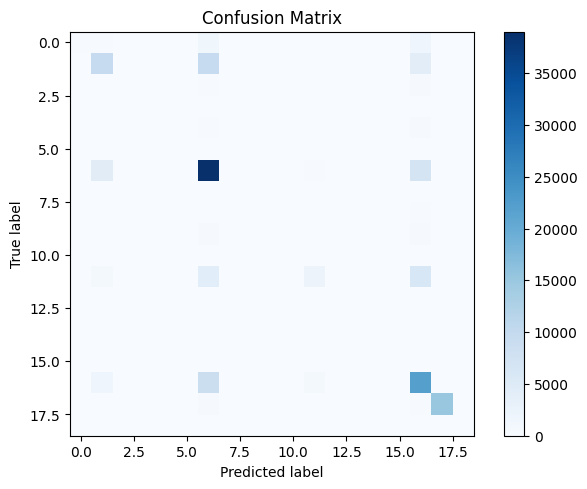

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch



def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=max_words, output_dim=hp.Int('embedding_dim', min_value=32, max_value=512, step=32), input_length=max_sequence_length))
    model.add(layers.Bidirectional(layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=512, step=32), return_sequences=True)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))  # Add dropout for regularization
    model.add(layers.Bidirectional(layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=512, step=32))))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='tuner_directory',
    project_name='my_tuner'
)




Reloading Tuner from tuner_directory/my_tuner/tuner0.json


In [ ]:
from tensorflow.keras import layers, callbacks


# Assuming you have defined X_train, y_train, X_val, y_val
tuner.search(X_resampled, y_resampled, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

final_model = tuner.hypermodel.build(best_hps)
final_model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
24242/24242 [==============================] - 674s 27ms/step - loss: 0.9311 - accuracy: 0.6646 - val_loss: 1.1466 - val_accuracy: 0.5814
Epoch 2/5
24242/24242 [==============================] - 669s 28ms/step - loss: 0.8301 - accuracy: 0.6984 - val_loss: 1.1086 - val_accuracy: 0.5940
Epoch 3/5
24242/24242 [==============================] - 646s 27ms/step - loss: 0.8090 - accuracy: 0.7050 - val_loss: 1.0959 - val_accuracy: 0.6004
Epoch 4/5
24242/24242 [==============================] - 684s 28ms/step - loss: 0.7958 - accuracy: 0.7097 - val_loss: 1.0851 - val_accuracy: 0.6035
Epoch 5/5
24242/24242 [==============================] - 678s 28ms/step - loss: 0.7858 - accuracy: 0.7134 - val_loss: 1.0790 - val_accuracy: 0.6063


In [ ]:
y_pred_prob = final_model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

4480/4480 [==============================] - 48s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.37      0.02      0.04      3592
           2       0.55      0.42      0.47     23536
           3       0.00      0.00      0.00       643
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00       695
           6       0.00      0.00      0.00        13
           7       0.60      0.75      0.67     50748
           8       0.00      0.00      0.00       176
           9       0.00      0.00      0.00       243
          10       0.28      0.03      0.05       866
          11       0.00      0.00      0.00        10
          12       0.63      0.14      0.23     13129
          13       0.00      0.00      0.00        45
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        36

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.